[[0.04223838]
 [0.97822166]
 [0.97082038]
 [0.0389769 ]
 [0.96334986]
 [0.02648263]
 [0.01850053]
 [0.96757324]]
[[7.97544629e-02 2.73050017e-02 1.05494971e-02]
 [2.64500468e-01 9.66390862e-01 3.73788015e-01]
 [1.36912790e-02 9.72715097e-01 1.95208168e-01]
 [5.44631052e-02 9.99972616e-01 9.31410095e-01]
 [9.49625278e-01 3.25253422e-05 8.65649895e-02]
 [9.87377343e-01 3.22427696e-02 8.41409715e-01]
 [7.51206145e-01 3.96692993e-02 6.83139538e-01]
 [9.26084052e-01 9.76911714e-01 9.91783081e-01]]


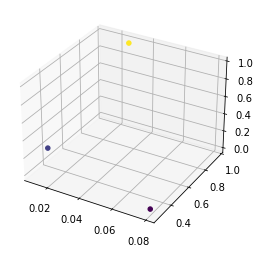

In [1]:
# Homework 1
# Adapted from XOR Gate Implementation by Siddhartha Dutta

import numpy as np
import matplotlib.pyplot as plt

inputs = np.array([[0,0,0],
                  [0,0,1],
                  [0,1,0],
                  [0,1,1],
                  [1,0,0],
                  [1,0,1],
                  [1,1,0],
                  [1,1,1]])

expected_output = np.array([[0],[1],[1],[0],[1],[0],[0],[1]])

epoch = 2000
lr = 1

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 3,3,1

hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))

output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
output_bias = np.random.uniform(size=(1, outputLayerNeurons))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

for i in range(epoch):
    #forward pass
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    #backpropogation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    #updates
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    
print(predicted_output)
print(hidden_layer_output)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.split(hidden_layer_output, 8)[0][:, None, None]
y = np.split(hidden_layer_output, 8)[1][None, :, None]
z = np.split(hidden_layer_output, 8)[2][None, None, :]
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

# The function here is to help adjust the model to be able to create a space where data points are linearlly separable, 
# allowing a model to classify without issue.
# The hidden units seem to, in the case of this problem, begin to have larger magnitudes in their weights and output
# as the model learns and moves forward to create a linearly separable space. At the point now, it seems that it will
# be able to classify with a high accuracy thanks to completely lineraly separate data points.